In [1]:
import pandas  as pd
import numpy   as np
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline
plt.style.use("tableau-colorblind10")

In [2]:
df = pd.read_csv("./content/diabetes_prediction_dataset.csv")    ## importing the dataset
df.head(10)                                                      ## viewing the first 10 rows of the dataset.

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


## Exploratory Data Analysis

### Gender

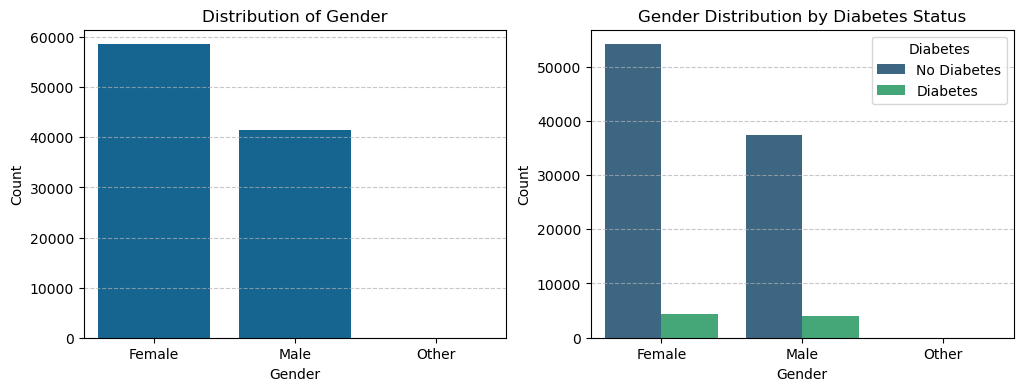

In [5]:
gender_distribution_plot = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='gender', order=df['gender'].value_counts().index)   ## Creating a countplot to view the distribution of gender.
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='gender', hue='diabetes', palette='viridis', order=df['gender'].value_counts().index) ## Creating a countplot to view the occurence of diabetes based on gender.
plt.title('Gender Distribution by Diabetes Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Diabetes', labels=['No Diabetes', 'Diabetes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig("./plots/gender_distribution.jpeg")
plt.show()

### Age

In [7]:
df['age'].describe() ## Viewing stats for the age column

count    100000.000000
mean         41.885856
std          22.516840
min           0.080000
25%          24.000000
50%          43.000000
75%          60.000000
max          80.000000
Name: age, dtype: float64

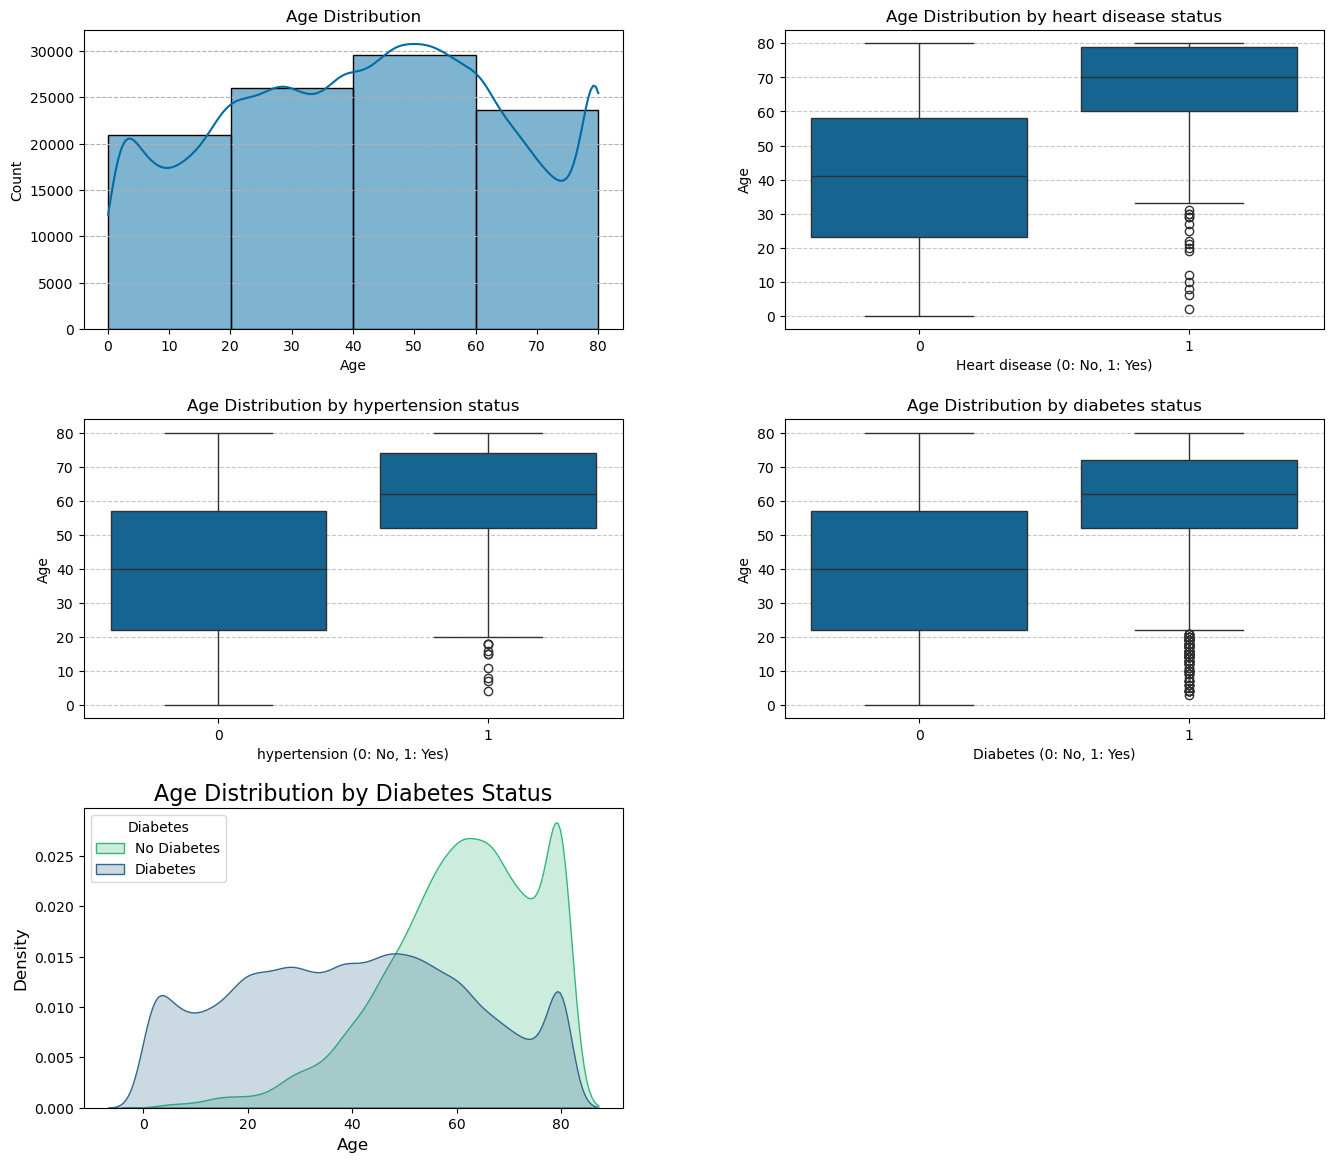

In [8]:
age_distribution_plot = plt.figure(figsize=(16, 14))

plt.subplot(3, 2, 1)
plt.subplots_adjust(wspace=0.3, hspace=0.3)                      ## Setting padding between each subplot.
sns.histplot(data=df, x="age", kde=True, bins=4)                 ## Creating a histogram to view the distribution of ages.
plt.title("Age Distribution")
plt.grid(axis='y', linestyle='--', alpha=1)
plt.xlabel("Age")

plt.subplot(3, 2, 2)
sns.boxplot(data=df, x='heart_disease', y='age')                 ## Creating a box plot to view the occurence of heart disease in various ages.
plt.title('Age Distribution by heart disease status')
plt.xlabel('Heart disease (0: No, 1: Yes)')
plt.ylabel('Age')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(3, 2, 3)
sns.boxplot(data=df, x='hypertension', y='age')                  ## Creating a box plot to view the occurence of hypertension in various ages.
plt.title('Age Distribution by hypertension status')
plt.xlabel('hypertension (0: No, 1: Yes)')
plt.ylabel('Age')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(3, 2, 4)
sns.boxplot(data=df, x='diabetes', y='age')                      ## Creating a box plot to view the occurence of diabetes in various ages.
plt.title('Age Distribution by diabetes status')
plt.xlabel('Diabetes (0: No, 1: Yes)')
plt.ylabel('Age')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(3, 2, 5)
sns.kdeplot(data=df, x='age', hue='diabetes', fill=True, common_norm=False, palette='viridis') ## Creating a KDE plot to analyse the occurence of diabetes based on age.
plt.title('Age Distribution by Diabetes Status', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Diabetes', labels=['No Diabetes', 'Diabetes'])
                                     
plt.savefig("./plots/age_distribution.jpeg")
plt.show()

#### Observations:
- From the distribution plot for age, we can observe that the majority of our data points are from individuals in the 41-60 age group.
- From the box plot for heart disease v/s age, we can observe that heart disease is quite prevelant in the 60 - 80 age group with quite a few outliers below 35.
- From the box plot for hypertension v/s age, we can observe that hypertension is quite prevelant in the 50 - 75 age group with a few outliers below 20.
- From the box plot for diabetes status v/s age, we can observe that diabetes is prevelant in the 50 - 75 age group with outliers below 22 years.

### Heart disease and Hypertension

In [11]:
heart_contingency_table = pd.crosstab(df['heart_disease'], df['hypertension'])  ## Creating a contingency table to analyse the correlation between heart disease and hypertension.
print("Contingency Table (Counts):")
print(heart_contingency_table)

Contingency Table (Counts):
hypertension       0     1
heart_disease             
0              89489  6569
1               3026   916


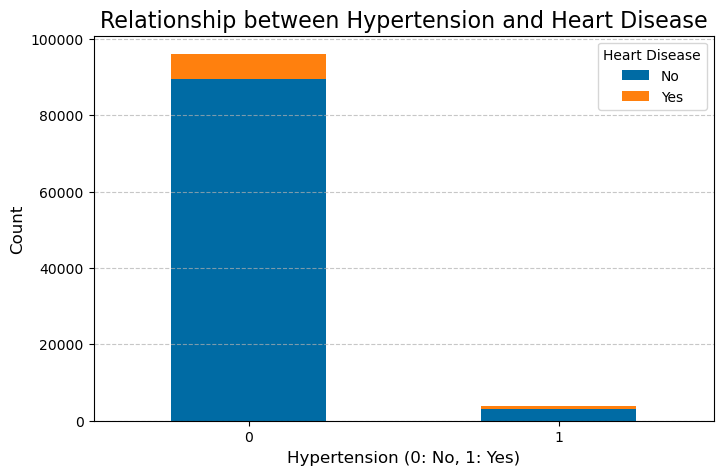

In [12]:
heart_contingency_table.plot(kind="bar", stacked=True, figsize=(8, 5))          ## Creating a stacked bar chart to compare occurence of heart disease and hypoer
plt.title('Relationship between Hypertension and Heart Disease', fontsize=16)
plt.xlabel('Hypertension (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [13]:
df[['heart_disease', 'hypertension']].corr()   ## Viewing the correlation coeffecient for heart disease and hypertension

,heart_disease,hypertension
heart_disease,1.000000,0.121262
hypertension,0.121262,1.000000


#### Observations:
- From the contingency table and stacked bar chart, we can see that there is a correlation between heart disease and hypertension. However on further analysis of correlation coefficent (0.1212) we can infer that there is a weak linear correlation.  

### Blood glucose and HbA1c

In [16]:
df[['blood_glucose_level', 'HbA1c_level']].describe()  ## Viewing the stats for blood glucose and HbA1c levels

,blood_glucose_level,HbA1c_level
count,100000.000000,100000.000000
mean,138.058060,5.527507
std,40.708136,1.070672
min,80.000000,3.500000
25%,100.000000,4.800000
50%,140.000000,5.800000
75%,159.000000,6.200000
max,300.000000,9.000000


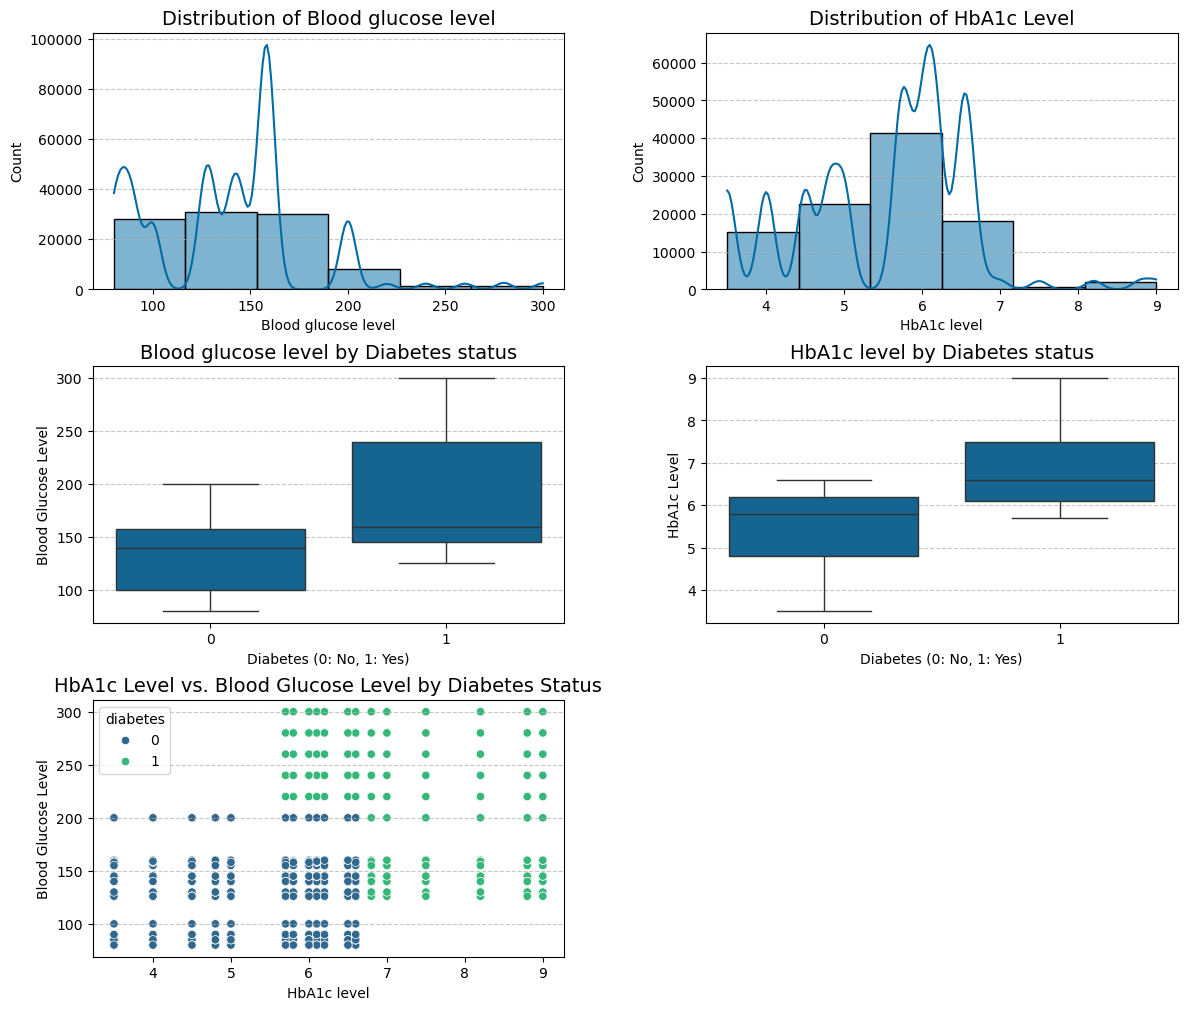

In [17]:
plt.figure(figsize=(14, 12))
plt.subplots_adjust(wspace=0.3, hspace=0.3)  

plt.subplot(3, 2, 1)
sns.histplot(data=df, x='blood_glucose_level', kde=True, bins=6)        ## Creating a histogram to view the distribution of blood glucose levels
plt.title('Distribution of Blood glucose level', fontsize=14)
plt.xlabel('Blood glucose level', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(3, 2, 2)
sns.histplot(data=df, x='HbA1c_level', kde=True, bins=6)                ## Creating a histogram to view the distribution of HbA1c levels
plt.title('Distribution of HbA1c Level', fontsize=14)
plt.xlabel('HbA1c level', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(3, 2, 3)
sns.boxplot(data=df, x="diabetes", y="blood_glucose_level")             ## Creating a box plot to view the distribution of blood glucose level by diabetes status.
plt.title("Blood glucose level by Diabetes status", fontsize=14)
plt.xlabel("Diabetes (0: No, 1: Yes)", fontsize=10)
plt.ylabel("Blood Glucose Level", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(3, 2, 4)
sns.boxplot(data=df, x="diabetes", y="HbA1c_level")                     ## Creating a box plot to view the distribution of HbA1c level by diabetes status.
plt.title("HbA1c level by Diabetes status", fontsize=14)
plt.xlabel("Diabetes (0: No, 1: Yes)", fontsize=10)
plt.ylabel("HbA1c Level", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(3, 2, 5)
sns.scatterplot(data=df, x='HbA1c_level', y='blood_glucose_level', hue='diabetes', palette='viridis')  ## Creating a scatter plot to view the distribution of blood glucose and HbA1c levels by diabetes status.
plt.title('HbA1c Level vs. Blood Glucose Level by Diabetes Status', fontsize=14)
plt.xlabel('HbA1c level', fontsize=10)
plt.ylabel('Blood Glucose Level', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig('./plots/blood_glucose.jpeg')
plt.show()

#### Observations:
- Among the individuals with diabetes, a significant portion have blood glucose levels in the 145-240 range and HbA1c levels between 6.1% and 7.5%.

## Feature Engineering

### Smoking History

In [21]:
df['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

* From smoking history, the values 'former', 'not current' and 'ever' might mean the same thing - Individual used to smoke at some point in their life. We can reduce the number of categories to 4:
    1.  'former_or_ever' : For the values 'former', 'not current' and 'ever'
    2.  'current'        : For the value 'current'.
    3.  'never'          : For the value 'never'.
    4.  'unknown'        : For the value 'No Info'.

In [23]:
def map_smoking_history_value(smoking_history):                     ## Creating a function to help map the smoking history value to the respective category
    smoking_history = smoking_history.lower().strip()
    if smoking_history in ['former', 'not current', 'ever']:
        return 'former_or_ever'
    elif smoking_history in ['current', 'never']:
        return smoking_history
    else:
        return 'unknown'

In [24]:
df['smoking_history_mapped'] = df['smoking_history'].apply(map_smoking_history_value)

In [25]:
print(df[['smoking_history', 'smoking_history_mapped']])

      smoking_history smoking_history_mapped
0               never                  never
1             No Info                unknown
2               never                  never
3             current                current
4             current                current
...               ...                    ...
99995         No Info                unknown
99996         No Info                unknown
99997          former         former_or_ever
99998           never                  never
99999         current                current

[100000 rows x 2 columns]


### Encoding Categorical variables

#### Smoking history

In [28]:
smoking_history_encoded = pd.get_dummies(df['smoking_history_mapped'], prefix="smoking_history", dtype=int)

#### Gender

In [30]:
gender_encoded = pd.get_dummies(df['gender'], prefix="gender", dtype=int)

In [31]:
df = pd.concat([df, smoking_history_encoded, gender_encoded], axis=1)
df = df.drop(columns=["smoking_history", "smoking_history_mapped", "gender"], axis=1)

In [32]:
df.to_csv('./content/Diabetes-Classification-cleaned.csv', index=False)

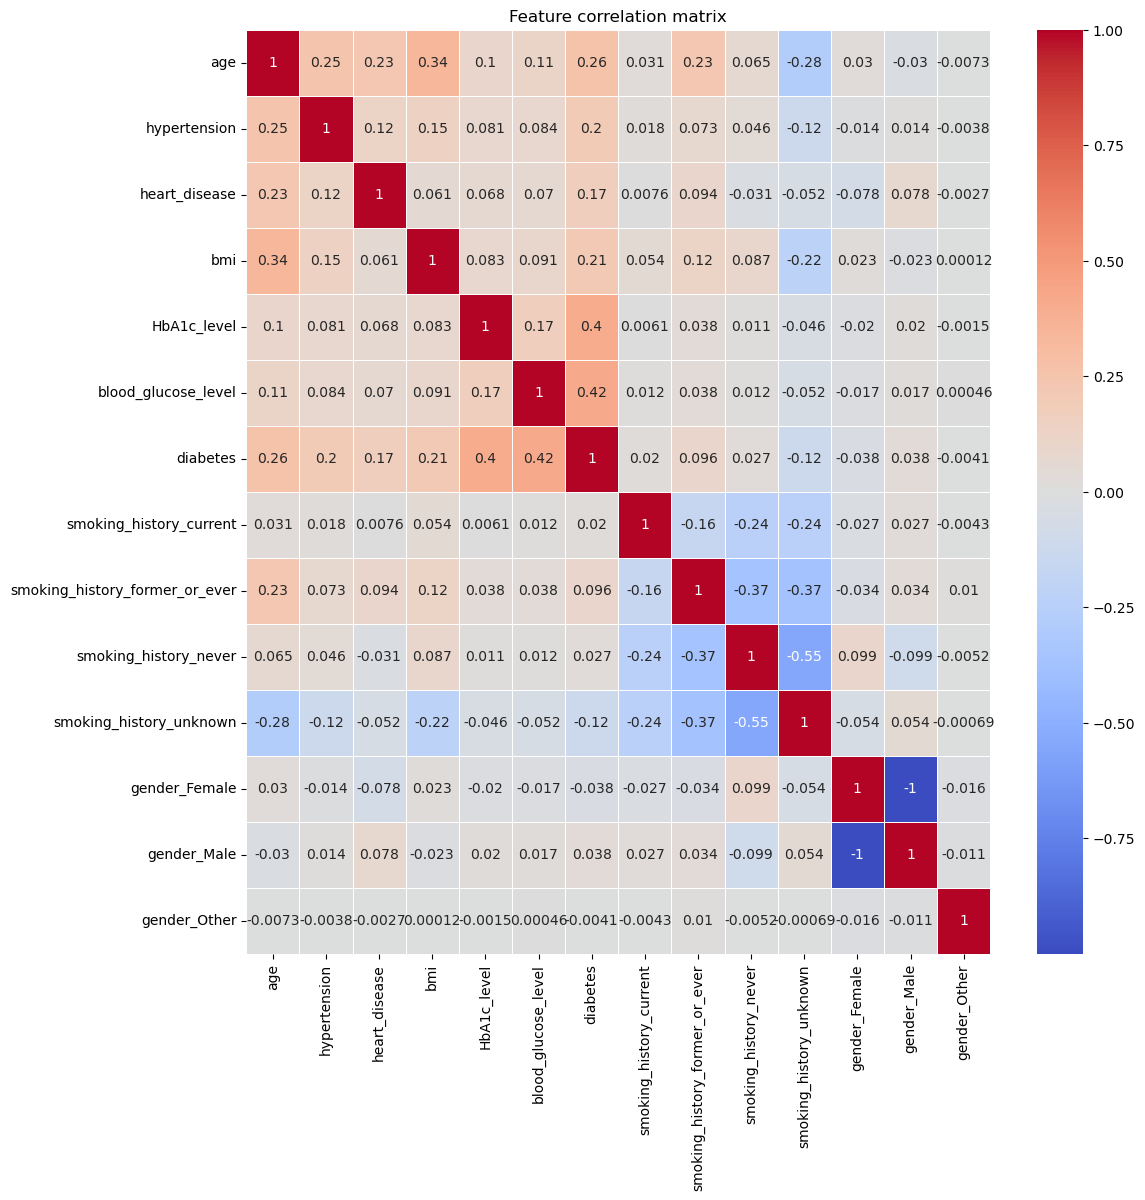

In [33]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature correlation matrix")
plt.savefig("./plots/feature_correlation_matrix")
plt.show()

### Creating training and test samples

In [35]:
from sklearn.model_selection import StratifiedShuffleSplit

sampler = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in sampler.split(df, df['diabetes']):
    training_set = df.loc[train_index]
    testing_set  = df.loc[test_index]


### Handling Class Imbalance

In [37]:
diabetes_data_count = training_set['diabetes'].value_counts()
diabetes_data_count

diabetes
0    73200
1     6800
Name: count, dtype: int64

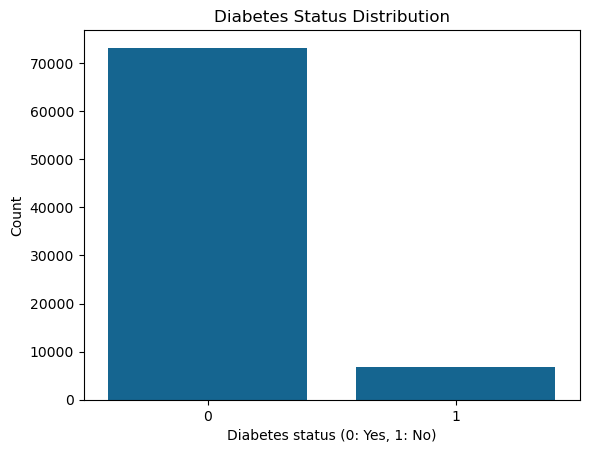

In [38]:
sns.barplot(x=diabetes_data_count.index.values, y=diabetes_data_count.values)
plt.xlabel("Diabetes status (0: Yes, 1: No)")
plt.ylabel("Count")
plt.title("Diabetes Status Distribution")
plt.show()

- From the above plot, we can see that the dataset exhibits significant class imbalance, with the negative class ('No Diabetes') comprising over 90% of the specimens. This imbalance could lead to a model that is biased towards the majority class and performs poorly on the minority class ('Diabetes').
- To overcome this, we will use SMOTE to create a balanced dataset.

### Separating feature and target variables

In [41]:
X_train = training_set.drop(columns=['diabetes'], axis=1)
y_train = training_set['diabetes']
X_test  = testing_set.drop(columns=['diabetes'], axis=1)
y_test  = testing_set['diabetes']
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80000, 13), (80000,), (20000, 13), (20000,))

In [42]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="minority")
X_train, y_train  = smote.fit_resample(X_train, y_train)

In [43]:
y_train.value_counts()

diabetes
1    73200
0    73200
Name: count, dtype: int64

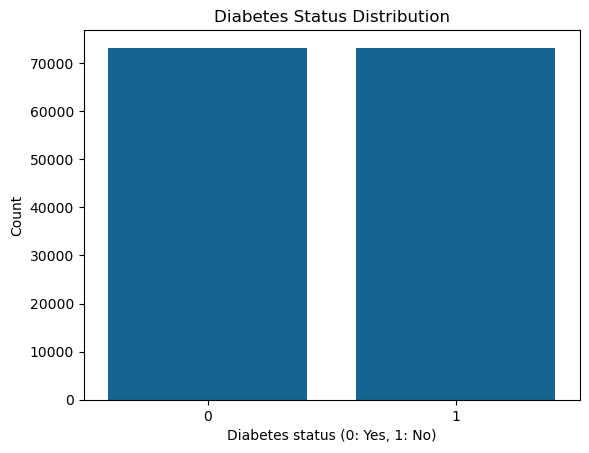

In [44]:
sns.barplot(x=y_train.value_counts().index.values, y=y_train.value_counts().values)
plt.xlabel("Diabetes status (0: Yes, 1: No)")
plt.ylabel("Count")
plt.title("Diabetes Status Distribution")
plt.show()

### Feature Scaling

In [46]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

## Model Training

### Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_train, y_train)

LogisticRegression()

In [50]:
y_pred = logistic_regressor.predict(X_test)

#### Analyzing the models performance

##### Confusion matrix

In [53]:
from sklearn.metrics import confusion_matrix

print("Confusion matrix for logistic regression model is: \n", confusion_matrix(y_test, y_pred))

Confusion matrix for logistic regression model is: 
 [[17454   846]
 [  395  1305]]


##### Accuracy

In [55]:
from sklearn.metrics import accuracy_score

print("Accuracy of the logistic regression model is: ", accuracy_score(y_test, y_pred))

Accuracy of the logistic regression model is:  0.93795


- This means that the model correctly predicted 93% of the outcomes

##### Recall

In [58]:
from sklearn.metrics import recall_score

print("Recall of the logistic regression model is: ", recall_score(y_test, y_pred))

Recall of the logistic regression model is:  0.7676470588235295


- This means that of all the positives, the model correctly identified 76% of them 

##### Precision

In [61]:
from sklearn.metrics import precision_score

print("Precision of the logistic regression model is: ", precision_score(y_test, y_pred))

Precision of the logistic regression model is:  0.606694560669456


##### False positive rate

In [63]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print("False positive rate of the logistic regression model is: ", (fp / (fp + tn)))

False positive rate of the logistic regression model is:  0.04622950819672131


- This means that of all the patients who do not have diabetes, the model incorrectly predicted just 4.6% of them as having diabetes